In [2]:
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import math

# Package imports for time series analysis
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error,mean_squared_error

## Vraag 1

Wat is het meetniveau van elk van deze variabelen:

1. de functie van een werknemer (uitvoerend, leidinggevend, ...)
2. het salaris van de werknemer
3. de naam van het departement van de werknemer
4. de anciënniteit (= het aantal jaren in dienst) van de werknemer

### Antwoorden Vraag 1
1. Ordinaal, met het idee dat er een hiërarchie zit in het bedrijf
2. Ratio
3. Nominaal
4. Ratio

## Vraag 2

De Vlaamse overheid wil het sociaal welbevinden van haar inwoners onderzoeken. Daarom laat ze een computer willekeurig gsm-nummers kiezen uit een databank met daarin alle bekende gsm-nummers van Vlamingen. Wanneer iemand niet reageert, wordt herhaaldelijk teruggebeld tot er een antwoord komt of tot een maximum aantal pogingen wordt bereikt. 

1. Is dit een random sample? Leg uit.
2. Welk type fout(en) wordt hier gemaakt?
3. Is dit een goede sample? Leg uit.

### Antwoorden Vraag 2

1. Nee, eerst zullen enkel mensen met een gsm worden gecontacteerd, en daarnaast zullen bepaalde groepen (voornamelijk jongeren) niet opnemen als ze gebeld worden door een onbekend nummer. Dit zorgt er dus voor dat de sample niet random zal zijn.
2. Een systematische steekproeffout.
3. Nee, door de systematische steekproeffout zal de random sample niet echt random zijn.

## Vraag 3 

Het aantal werknemers op de loonlijst bij een voedingsverwerkend bedrijf wordt aan het begin van elke maand geregistreerd.
Deze gegevens staan hieronder.

1. Geef de datatypes van beide kolommen
2. Vorm de kolom 'datum' om naar het type datetime. Ook als dit je niet lukt kan je verder werken.
3. Maak de volgende plot.

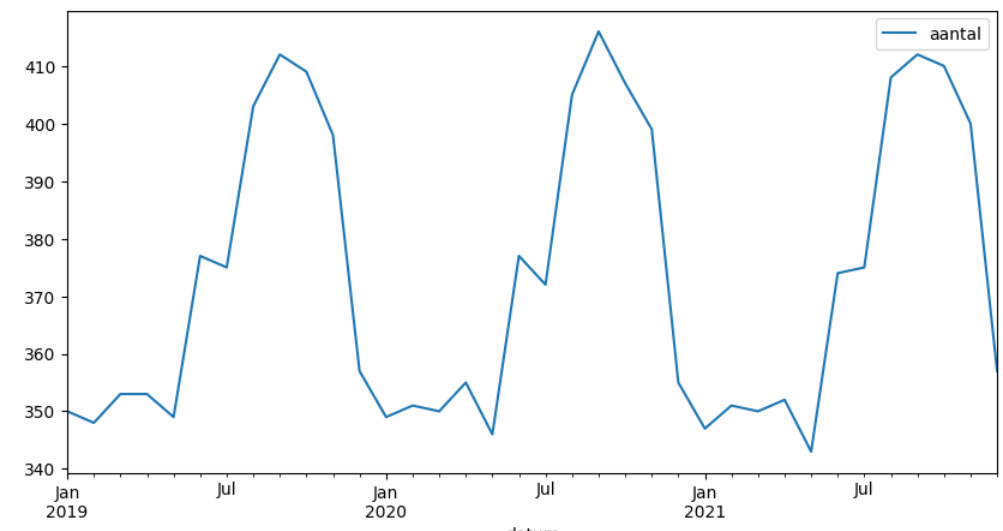

4. Maak een voorspelling voor de eerste vier maanden van het volgende jaar met behulp van de meest geschikte methode. Leg uit waarom je voor deze methode kiest.
5. Maak een plot inclusief de prognose.
6. Maak de volgende berekeningen
- 6.1 Bereken het gemiddeld aantal werknemers in 2020
- 6.2 Hoeveel maanden telde het bedrijf meer dan 400 werknemers?




In [9]:
dfwerknemers = pd.DataFrame(data={
    'datum': ['2019/01/01', '2019/02/01', '2019/03/01', '2019/04/01', '2019/05/01', '2019/06/01', '2019/07/01', '2019/08/01', '2019/09/01', '2019/10/01', '2019/11/01', '2019/12/01', '2020/01/01', '2020/02/01', '2020/03/01', '2020/04/01', '2020/05/01', '2020/06/01', '2020/07/01', '2020/08/01', '2020/09/01', '2020/10/01', '2020/11/01', '2020/12/01', '2021/01/01', '2021/02/01', '2021/03/01', '2021/04/01', '2021/05/01', '2021/06/01', '2021/07/01', '2021/08/01', '2021/09/01', '2021/10/01', '2021/11/01', '2021/12/01'],
    'aantal': [350,348,353,353,349,377,375,403,412,409,398,357,349,351,350,355,346,377,372,405,416,407,399,355,347,351,350,352,343,374,375,408,412,410,400,357]
})

In [10]:
# 1.
print("1.\n", dfwerknemers.dtypes)

1.
 datum     object
aantal     int64
dtype: object


In [11]:
# 2. 
dfwerknemers.datum = pd.DatetimeIndex(dfwerknemers['datum'], freq='MS')
dfwerknemers.set_index('datum', inplace=True)

In [12]:
dfwerknemers.head()

,aantal
datum,
2019-01-01,350
2019-02-01,348
2019-03-01,353
2019-04-01,353
2019-05-01,349


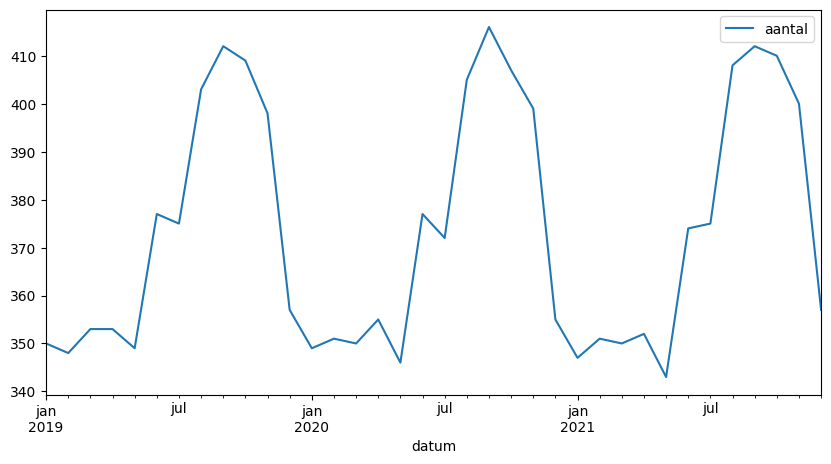

In [13]:
# 3.
dfwerknemers.plot(y='aantal', figsize=[10,5]);

In [14]:
# 4. Triple Exponential Smoothing, want er is een duidelijke seasonal trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = dfwerknemers['aantal']

aantal_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, freq='MS').fit()

aantal_predicted = aantal_hw.forecast(4)
aantal_predicted

2022-01-01    348.250083
2022-02-01    349.583455
2022-03-01    350.583423
2022-04-01    352.916788
Freq: MS, dtype: float64

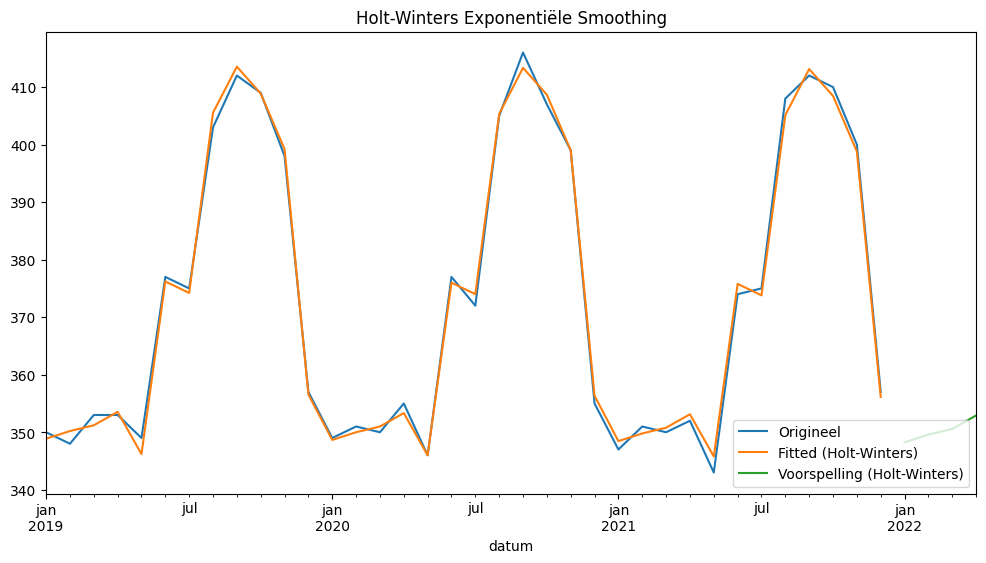

In [22]:
plt.figure(figsize=(12, 6))
train.plot(label='Origineel', legend=True)
aantal_hw.fittedvalues.plot(label='Fitted (Holt-Winters)', legend=True)
aantal_predicted.plot(label='Voorspelling (Holt-Winters)', legend=True)
plt.title('Holt-Winters Exponentiële Smoothing')
plt.show()

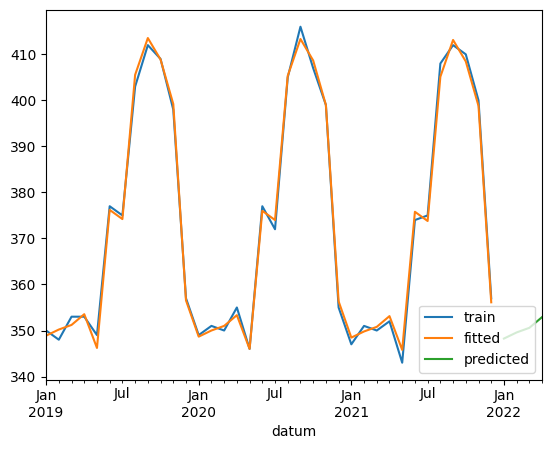

In [54]:
# 5. 
train.plot(legend=True, label='train')
aantal_hw.fittedvalues.plot(legend=True, label='fitted')
aantal_predicted.plot(legend=True, label='predicted');

In [56]:
#- 6.1 Bereken het gemiddeld aantal werknemers in 2020
#- 6.2 Hoeveel maanden telde het bedrijf meer dan 400 werknemers?
# 6.1
gemaantal2020 = dfwerknemers[(dfwerknemers.index >= '2020-01-01') & (dfwerknemers.index < '2021-01-01')]['aantal'].mean()
print("6.1: ", gemaantal2020)

# 6.2
maandenmeerdan400 = dfwerknemers[dfwerknemers['aantal'] > 400].size
print("6.2: ", maandenmeerdan400)

6.1:  373.5
6.2:  9


## Vraag 4
Een toenemende zorg van werkgevers is de tijd die werknemers besteden aan 'surfen op het net voor niet professionele doeleinden'. Men schat dat per werknemer 2 uur per dag hieraan verloren gaat. Stel dat de CEO van een groot bedrijf wil bepalen of de gemiddelde hoeveelheid verspilde tijd minder is dan de gerapporteerde 120 minuten. In een willekeurige steekproef worden 10 werknemers gecontacteerd en wordt gevraagd naar de dagelijks verspilde tijd op het werk. (Er wordt waarschijnlijk anonimiteit gegarandeerd om waarheidsgetrouwe antwoorden te krijgen).  
Bewijzen de onderstaande gegevens dat de gemiddelde verspilde tijd voor dit bedrijf minder dan 120 minuten is?  
Voer een test uit met 5% significance level om deze vraag te beantwoorden.

1. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
2. Formuleer de nulhypothese en de alternatieve hypothese
3. Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.

In [66]:
# 1. 
print("1. Linkerzijdige t-test")
# 2. 
print("2. \nH0: mu = 120 minuten \nH1: mu < 120 minuten")

1. Linkerzijdige t-test
2. 
H0: mu = 120 minuten 
H1: mu < 120 minuten


In [23]:
verspilde_tijd = [108, 112, 117, 130, 111, 131, 113, 113, 105, 128]

# Properties of the sample:
n = len(verspilde_tijd)              # Sample size
m = 120          # (Hypothetical) population mean
s_sample = np.std(verspilde_tijd, ddof = 1)         # the standard deviation of the population is unknown
m_sample = np.mean(verspilde_tijd)    # Sample mean
alpha = 0.05        # Significance level (chosen by the researcher)

print("3. Sample mean:", m_sample)
t = stats.t.isf(alpha/2, df = n - 1)
print("t-score: %.5f" % t)

3. Sample mean: 116.8
t-score: 2.26216


In [ ]:
# 4. 
p = stats.t.cdf(m_sample, loc = m, scale = s_sample / np.sqrt(n), df = n - 1)
print(f"4. p-value: {p}")
if(p < alpha):
    print("5. p < alpha: reject H0")
else:
    print("5. p > alpha: do not reject H0")

#OF

t_stat, p_val = stats.ttest_1samp(a=verspilde_tijd, popmean=m, alternative='less')
print(t_stat) # -> deze score is anders dan de bovenstaande, geen idee waarom
print(p_val)

4. p-value: 0.15604432057125792
5. p > alpha: do not reject H0
-1.0709057958075854
0.15604432057125805


5. De sample is waarschijnlijk genoeg. We verwerpen de null hypothese niet.

## Vraag 5 

Er zijn twee verkeerslichten op de route die een bepaald individu volgt om van zijn huis naar het werk te gaan.  
E = de gebeurtenis dat het individu moet stoppen bij het eerste licht  
F = de gebeurtenis dat het individu moet stoppen bij het tweede licht 

$P(E)$ = 0.4  
$P(F)$ = 0.3  
$P(E \cap F)$ = 0.15  

1. Zijn E en F onafhankelijke events? Leg kort uit waarom wel of waarom niet?
2. Wat is de kans dat het individu ten minste aan één van de lichten moet stoppen?
3. Wat is de kans dat het individu aan geen van beide lichten moet stoppen?
4. Wat is de kans dat het individu ten minste aan het eerste licht moet stoppen?
5. Wat is de kans dat het individu aan exact één van de lichten moet stoppen?
6. Wat is de kans dat het individu enkel aan het eerste licht moet stoppen?


1. Nee, als ze onafhankelijk zouden zijn dan geldt dat: $P(E \cap F)$ = 0.15 moet gelijk zijn aan $P(E)$ * $P(F)$ = 0.12. Ze zijn niet gelijk, dus wel afhankelijk.
2. $P(E)$ + $P(F)$ - $P(E \cap F)$ = 0.55
3. 1 - 0.55 = 0.45
4. $P(E)$ = 0.4
5. $P(E)$ - $P(E \cap F)$ + $P(F)$ - $P(E \cap F)$ = 0.4 - 0.15 + 0.3 - 0.15 = 0.4
6. $P(E)$ - $P(E \cap F)$ = 0.4 - 0.15 = 0.25

## Vraag 6 
In een studie werden patiënten met een hoge bloeddruk willekeurig toegewezen aan één van twee groepen. In de 'praatgroep' werden vragen gesteld over hun medische geschiedenis en over de strefssfactoren in hun leven in de minuten voorafgaand aan het meten van de bloeddruk. In de 'telgroep' werd gevraagd vier keer hardop te tellen van 1 tot 100 voordat de bloeddruk werd gemeten.  
Is er een verschil in bloeddruk tussen de twee groepen?


1. Maak een plot
2. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
3. Formuleer de nulhypothese en de alternatieve hypothese
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.


In [24]:
praatgroep = [104, 110, 107, 112, 108, 103, 108, 118]
telgroep = [110, 96, 103, 98, 100, 109, 97, 105]

# make dataframe
therapie = pd.DataFrame(data={
    'praatgroep': praatgroep,
    'telgroep': telgroep
})

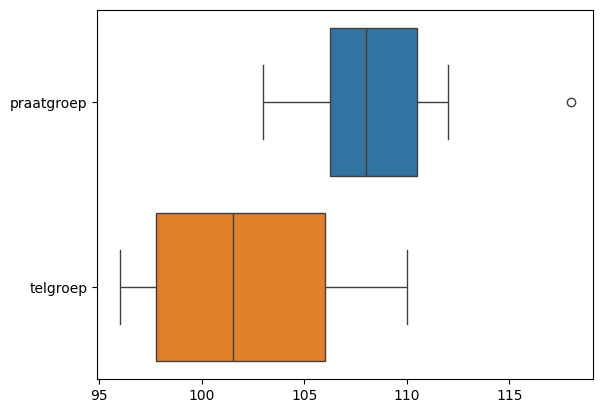

In [70]:
# 1.
sns.boxplot(
    data=therapie,
    orient='h');

2. De t-test for two independent samples
3. - H0: mu1 - mu2 = 0 - De bloeddruk is dezelfde in beide groepen
   - H1: mu2 /= mu1 - De bloeddruk is significant verschillend in beide groepen

In [77]:
stat, p = stats.ttest_ind(alternative='two-sided',
    a=therapie['praatgroep'],
    b=therapie['telgroep'])
print("4. p-waarde: ", p)

4. p-waarde:  0.02266963707971508


5. De p-waarde is vrij klein. Op een significantieniveau van b.v. 0.05 bevat de dataset wel bewijs dat de twee groepen een verschillende bloeddruk hebben

## Vraag 7

Stel dat de verdeling van de netto-typsnelheid in
woorden per minuut (wpm) voor ervaren typisten kan worden
benaderd kan worden door een normale curve met gemiddelde 60 wpm en
standaardafwijking 15 wpm
1. Wat is de kans dat de netto-snelheid van een willekeurig gekozen typist
maximaal 60 wpm is?
2. Wat is de kans dat de netto-snelheid van een willekeurig gekozen typist
nettosnelheid tussen 45 en 90 wpm ligt?
3. Zou je verbaasd zijn om een typist te vinden
wiens netto-snelheid hoger is dan 105 wpm?
4. Stel dat een speciale training zal worden gegeven aan de langzaamste 20% van de typisten. Welke typesnelheden zouden in aanmerking komen voor deze opleiding?

In [25]:
m = 60
s = 15
print("Alle kansen worden berekent op een schaal van 0 to 1. Een kans van 0.3 betekent dus 30%.")
print("1. P(Z <= 60) ~= %.4f" % stats.norm.pdf(60, loc=m, scale=s))
deel = stats.norm.cdf(x=90, loc=m, scale=s) - stats.norm.cdf(x=45, loc=m, scale=s)
print("2. P(45 < Z < 90) ~=", deel)
print("3. P(Z > 105) ~= %.4f -> Ja, ik zou heel verbaasd zijn, want die kans is heel klein (0.13 procent)" % stats.norm.sf(105, loc=m, scale=s))
print("4. Alle snelheden onder en gelijk aan %.4f" % stats.norm.isf(0.8, loc=m, scale=s))


Alle kansen worden berekent op een schaal van 0 to 1. Een kans van 0.3 betekent dus 30%.
1. P(Z <= 60) ~= 0.0266
2. P(45 < Z < 90) ~= 0.8185946141203637
3. P(Z > 105) ~= 0.0013 -> Ja, ik zou heel verbaasd zijn, want die kans is heel klein (0.13 procent)
4. Alle snelheden onder en gelijk aan 47.3757


## Vraag 8 

Een maatstaf voor het succes van een knieoperatie is het bewegingsbereik van het kniegewricht na de operatie. Het postoperatieve bewegingsbereik werd geregistreerd voor 12 patiënten na een knieoperatie. De leeftijd van elke patiënt werd ook geregistreerd. De gegevens zijn hieronder gegeven.

1. Visualiseer de data met een geschikte plot
2. Geef de vergelijking van de regressierechte 
3. Geef het geschatte bewegingsbereik van iemand van 38 jaar oud.
4. Bereken de correlatiecoëfficient (symbool + waarde)
5. Geef de interpretatie voor de waarde van de correlatiecoëfficient
6. Stel dat we het bewegingsbereik uitdrukken als een hoek in radialen in plaats van een hoek in graden, zal de waarde van de correlatiecoëfficient dan veranderen? Illustreer je antwoord met de opgegeven data.  
hoek in radialen = hoek in graden / 180 * $π$


In [95]:
dfknie = pd.DataFrame(data={'leeftijd': [35, 24, 40, 31, 28, 25, 26, 16, 14, 20, 21, 30], 
                            'bewegingsbereik': [154, 142, 137, 133, 122, 126, 135, 135, 108, 120, 127, 122]})



<Axes: xlabel='leeftijd', ylabel='bewegingsbereik'>

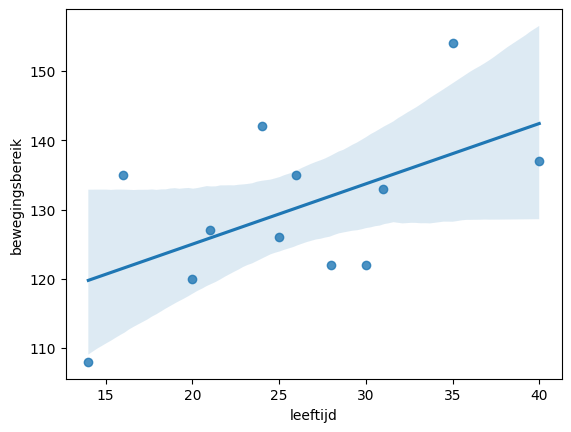

In [98]:
#1. 
sns.regplot(data=dfknie,
            x='leeftijd', y='bewegingsbereik')

In [100]:
# 2. 
from sklearn.linear_model import LinearRegression

leeftijd_x = dfknie['leeftijd'].values.reshape(-1,1)
bewegingsbereik_y = dfknie['bewegingsbereik']

weight_model = LinearRegression().fit(leeftijd_x, bewegingsbereik_y)

print(f"2. Regression line: ŷ = {weight_model.intercept_} + {weight_model.coef_[0]} x")

2. Regression line: ŷ = 107.58311345646442 + 0.8709762532981523 x


In [108]:
# 3. 
schattingbbereik = weight_model.intercept_ + (weight_model.coef_ * 38)
print(f"3. Geschatte bewegingsbereik van iemand van 38 jaar oud: {schattingbbereik[0]:.4f}")

3. Geschatte bewegingsbereik van iemand van 38 jaar oud: 140.6802


In [110]:
# 4.
cor = np.corrcoef(
    dfknie['leeftijd'],
    dfknie['bewegingsbereik'])[0][1]
print(f"4. R ≈ {cor:.4f}")

4. R ≈ 0.5534


5. De R waarde zegt ons dat er een stijgend en een gemiddeld verband is tussen de leeftijd en het bewegingsbereik

In [112]:
# 6.
dfknie['radialenhoek'] = dfknie['bewegingsbereik'] / 180 * math.pi
cormetradialen = np.corrcoef(
    dfknie['leeftijd'],
    dfknie['radialenhoek'])[0][1]
print(f"6. R met radialen ≈ {cor:.4f}")
print("De correlatiecoëfficiënt is niet gevoelig voor de meeteenheid van de variabelen. Als je observaties omrekent naar een andere meeteenheid, zal de correlatiecoëfficiënt niet veranderen.")

6. R met radialen ≈ 0.5534
De correlatiecoëfficiënt is niet gevoelig voor de meeteenheid van de variabelen. Als je observaties omrekent naar een andere meeteenheid, zal de correlatiecoëfficiënt niet veranderen.


## Vraag 9 

We weten op basis van historische data dat de vluchttijden (in minuten) voor een specifieke vlucht normaal verdeeld zijn.  
De gemeten vluchttijden tussen 1 januari en 31 maart zijn hieronder gegeven. 


1. Bereken en geef een 90% betrouwbaarheidsinterval voor
de gemiddelde vluchttijd voor deze vlucht.


In [26]:
vluchttijden = np.array([57, 54, 55, 51, 56, 48, 52, 51, 59, 59, 57, 54, 55, 51, 56, 48, 52, 51, 59, 59, 57, 54, 55, 51, 56, 48, 52, 51, 59, 59, 57, 54, 55, 51, 56, 48, 52, 51, 59, 59])

In [117]:
m  = vluchttijden.mean()
s = vluchttijden.std()
n = vluchttijden.size
alpha = 0.1
se = s/np.sqrt(n)

a, b = stats.t.interval(1-alpha, df = n - 1, loc=m, scale=se)
print(f"Een 90% betrouwbaarheidsinterval voor gemiddelde vluchttijd voor deze vlucht is [{a:.4f}, {b:.4f}]")

Een 90% betrouwbaarheidsinterval voor gemiddelde vluchttijd voor deze vlucht is [53.2710, 55.1290]


## Vraag 10 
Een volkswijsheid luidt dat er meer kinderen geboren worden gedurende bepaalde fasen van de maancyclus, in het bijzonder bij volle maan. In 2005 werd een classificatie gedaan van het aantal geboortes alnaargelang de maancyclus. 
Een steekproef van het aantal geboortes gedurende verschillende maancycli wordt hieronder gegeven.  
Is er een verband tussen de maancyclus en het aantal geboortes?

1. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
2. Formuleer de nulhypothese en de alternatieve hypothese
3. Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.


In [125]:
dfmaan = pd.DataFrame(data={'maanfase': ['nieuwe maan', 'jonge maansikkel', 'eerste kwartier', 'wassende maan', 'volle maan', 'afnemende maan', 'laatste kwartier', 'asgrauwe maan'], 
                            'aantal_dagen': [24, 152, 24, 149, 24, 150, 24, 152],
                            'aantal_geboorten': [7680, 48442, 7579, 47814, 7711, 47595, 7733, 48230]})

print("1. De goodness-of-fit test")

1. De goodness-of-fit test


2. - H0: mu1 = mu2 -> De sample is representatief van de bevolking, de geboortes responderen met die van de totale populatie
   - H1: mu1 /= mu2 -> Er is een significant verband tussen de aantal geboortes en de maancyclus, de verschillen met de populatie zijn te groot

In [131]:
# 3.
observed = dfmaan.aantal_geboorten
expected_p = dfmaan['aantal_dagen']/dfmaan['aantal_dagen'].sum()

alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("3. Chi-squared        χ² = %.4f" % chi2)
print("4. p-value             p = %.4f" % p)
print("5. De p-waarde is vrij groot, en zeker groter dan alpha, dus we verwerpen H0 niet.")

3. Chi-squared        χ² = 6.3111
4. p-value             p = 0.5039
5. De p-waarde is vrij groot, en zeker groter dan alpha, dus we verwerpen H0 niet.


## Vraag 11

Een doos bevat vijf stukjes papier, gemarkeerd met €1, €1, €1, €10 en €25.  
Een speler kiest twee stukjes papier en wint dan het grootste van de bedragen op de twee stukjes papier.  
Definieer een discrete random variabele _X_ met _X_ = gewonnen bedrag.  
1. Bepaal de discrete probabiliteitsdistributie van dit spel
- $P(X = 1) = ?$
- $P(X = 10) = ?$
- $P(X = 25) = ?$
2. Vervang in *Prob_X* hieronder [0.1, 0.3, 0.5] door de gevonden waarden voor een grafische weergave van de discrete probabiliteitsdistributie.  
3. Bereken de verwachtingswaarde (expectation) van de random variabele _X_.  


(Hint: beschouw de stukjes papier als genummerd 1, 2, 3, 4 en 5.)


1. 
- $P(X = 1) = 3/5
- $P(X = 10) = 1/5
- $P(X = 25) = 1/5

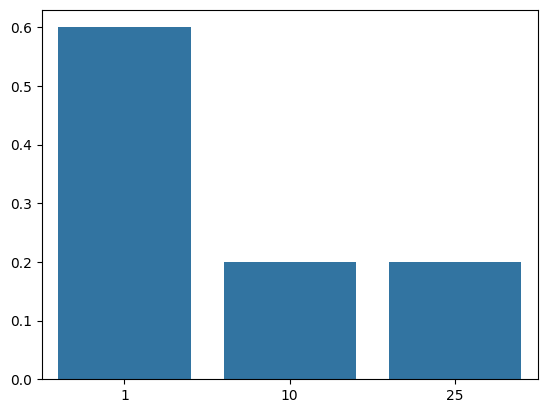

In [132]:
X = [1, 10, 25]             # Mogelijke uitkomsten. Ongewijzigd laten!!
Prob_X = [0.6, 0.2, 0.2]    # Vervang door de zelf gevonden waarden!!
sns.barplot(x = X, y = Prob_X);  # Visuele voorstelling. Ongewijzigd laten!!

In [133]:
print("Verachtingswaarde van X: ", 0.6*1 + 0.6*1 + 0.6*1 + 0.2*10 + 0.2*25)

Verachtingswaarde van X:  8.8


## Vraag 1

Wat is het meetniveau van elk van deze variabelen:

1. de functie van een werknemer (uitvoerend, leidinggevend, ...)
2. het salaris van de werknemer
3. de naam van het departement van de werknemer
4. de anciënniteit (= het aantal jaren in dienst) van de werknemer


### Antwoord vraag 1

1. ordinaal
2. ratio
3. nominaal
4. ratio

## Vraag 2 

De Vlaamse overheid wil het sociaal welbevinden van haar inwoners onderzoeken. Daarom laat ze een computer willekeurig gsm-nummers kiezen uit een databank met daarin alle bekende gsm-nummers van Vlamingen. Wanneer iemand niet reageert, wordt herhaaldelijk teruggebeld tot er een antwoord komt of tot een maximum aantal pogingen wordt bereikt. 

1. Is dit een random sample? Leg uit.
2. Welk type fout(en) wordt hier gemaakt?
3. Is dit een goede sample? Leg uit.

### Antwoord Vraag 2

1. Dit is geen random sample, want niet iedere Vlaming zijn/haar gsm-nummer zit in de databank. --> Niet iedere Vlaming heeft evenveel kans om gekozen te worden.
2. Systematische non-sampling error \
    Systematisch omdat alleen de Vlaming met een gsm-nummer in de databank gekozen kunnen worden. Als je gsm bijvoorbeeld kapot is en je hebt geen nieuw nummer doorgegeven, dan zit je niet in de sample.
    Non-sampling omdat de persoon de persoon die opneemt kan liegen over zijn/haar sociaal welbevinden. Je gaat minder kans hebben als je al 3 keer herhaaldelijk opgebeld bent en je hebt geen zin om te antwoorden.
3. Nee, want niet iedere Vlaming heeft evenveel kans om gekozen te worden. De kans is groter dat je gekozen wordt als je gsm-nummer in de databank zit.

## Vraag 3

Het aantal werknemers op de loonlijst bij een voedingsverwerkend bedrijf wordt aan het begin van elke maand geregistreerd.
Deze gegevens staan hieronder.

1. Geef de datatypes van beide kolommen
2. Vorm de kolom 'datum' om naar het type datetime. Ook als dit je niet lukt kan je verder werken.
3. Maak de volgende plot.

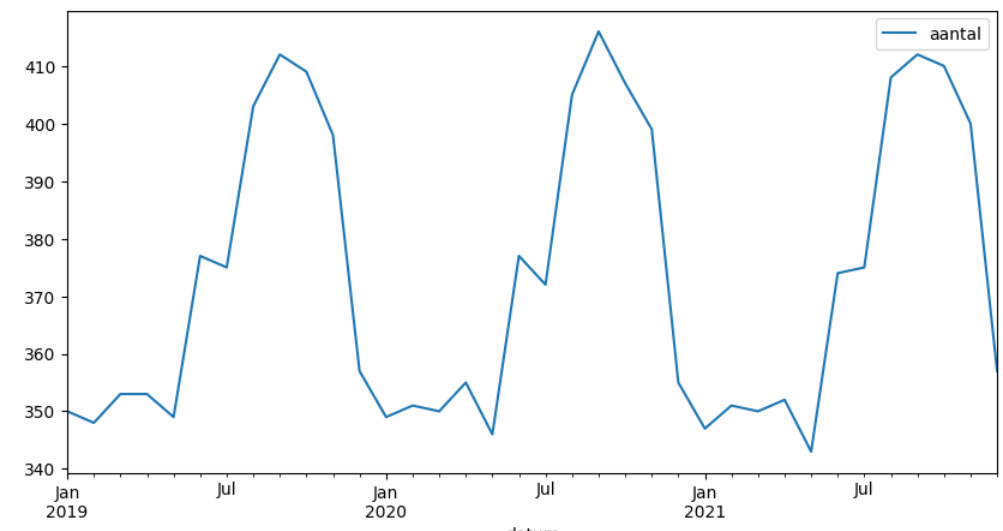

4. Maak een voorspelling voor de eerste vier maanden van het volgende jaar met behulp van de meest geschikte methode. Leg uit waarom je voor deze methode kiest.
5. Maak een plot inclusief de prognose.
6. Maak de volgende berekeningen
- 6.1 Bereken het gemiddeld aantal werknemers in 2020
- 6.2 Hoeveel maanden telde het bedrijf meer dan 400 werknemers?




In [4]:
dfwerknemers = pd.DataFrame(data={
    'datum': ['2019/01/01', '2019/02/01', '2019/03/01', '2019/04/01', '2019/05/01', '2019/06/01', '2019/07/01', '2019/08/01', '2019/09/01', '2019/10/01', '2019/11/01', '2019/12/01', '2020/01/01', '2020/02/01', '2020/03/01', '2020/04/01', '2020/05/01', '2020/06/01', '2020/07/01', '2020/08/01', '2020/09/01', '2020/10/01', '2020/11/01', '2020/12/01', '2021/01/01', '2021/02/01', '2021/03/01', '2021/04/01', '2021/05/01', '2021/06/01', '2021/07/01', '2021/08/01', '2021/09/01', '2021/10/01', '2021/11/01', '2021/12/01'],
    'aantal': [350,348,353,353,349,377,375,403,412,409,398,357,349,351,350,355,346,377,372,405,416,407,399,355,347,351,350,352,343,374,375,408,412,410,400,357]
})

### Vraag 1 ###
dfwerknemers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   datum   36 non-null     object
 1   aantal  36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 708.0+ bytes


In [7]:
### Vraag 2 ###
dfwerknemers['datum'] = pd.to_datetime(dfwerknemers['datum'])
# transform the date to month and year
dfwerknemers['datum'] = dfwerknemers['datum'].dt.strftime('%Y-%m')
dfwerknemers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   datum   36 non-null     object
 1   aantal  36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 708.0+ bytes


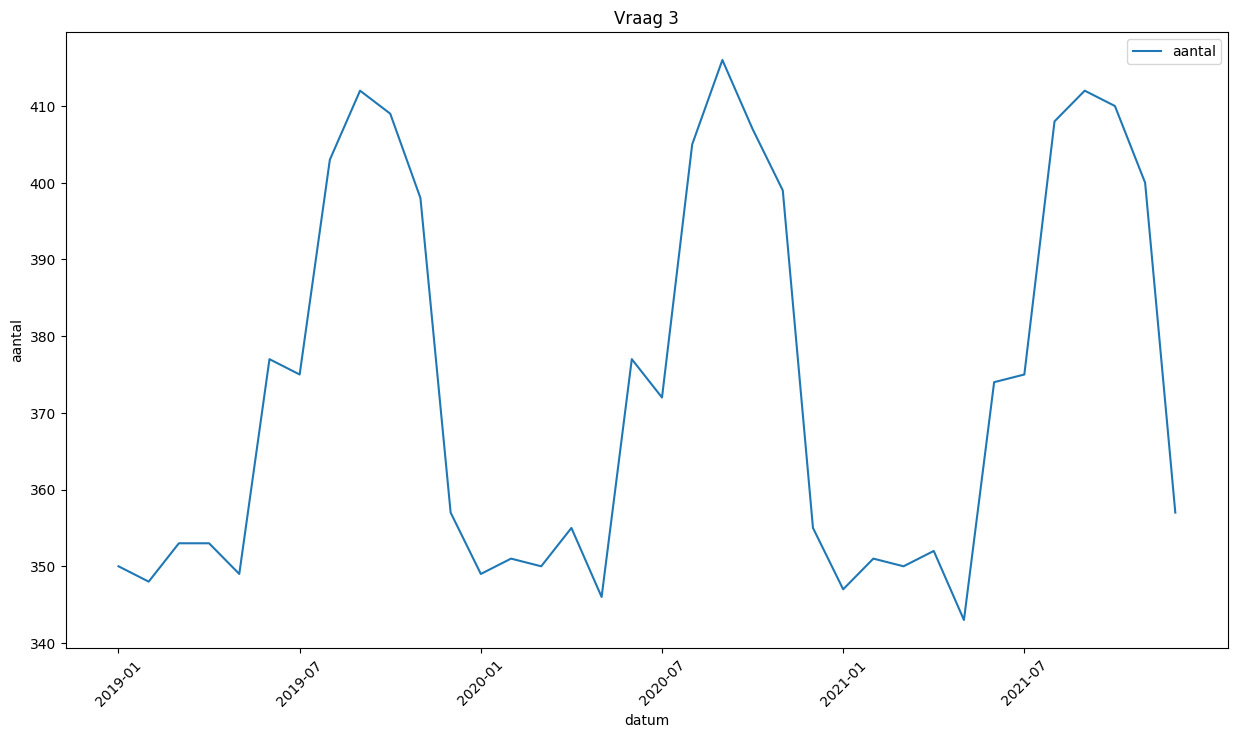

In [8]:
### Vraag 3 ###
sns.lineplot(data=dfwerknemers, x='datum', y='aantal', )
plt.legend(['aantal'])

plt.xticks(np.arange(0, len(dfwerknemers['datum']), 6), dfwerknemers['datum'][0::6], rotation=45)

plt.gcf().set_size_inches(15, 8)
plt.title('Vraag 3')
plt.show()

Text(0.5, 1.0, 'Vraag 5')

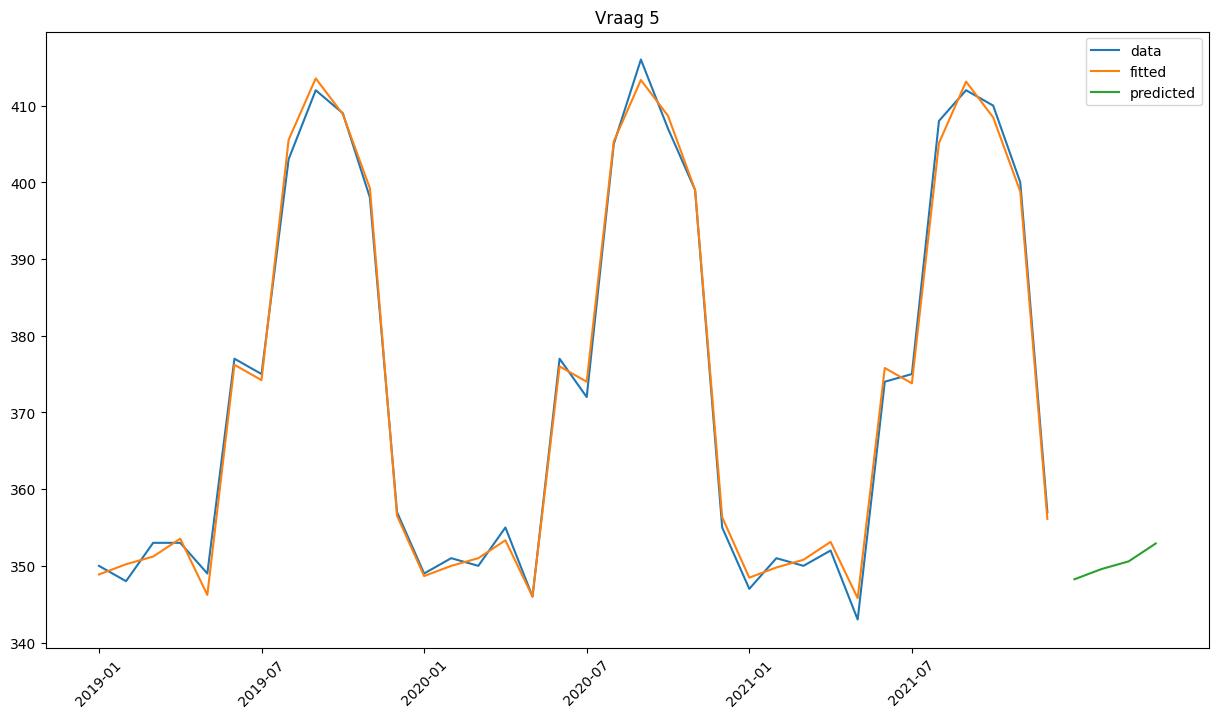

In [207]:
### Vraag 4 & 5 ###
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = dfwerknemers['aantal']

medewerkersLoonlijst = ExponentialSmoothing(data,
  trend='add', seasonal='add',
  seasonal_periods=12).fit()

medewerkersLoonlijst_predicted = medewerkersLoonlijst.forecast(4)

data.plot(legend=True, label='data')
medewerkersLoonlijst.fittedvalues.plot(legend=True, label='fitted')

medewerkersLoonlijst_predicted.plot(legend=True, label='predicted')

plt.xticks(np.arange(0, len(dfwerknemers['datum']), 6), dfwerknemers['datum'][0::6], rotation=45)
plt.gcf().set_size_inches(15, 8)

plt.title('Vraag 5')

In [208]:
### Vraag 6.1 ###
print('Gemiddeld aantal werknemers in 2020: ', dfwerknemers['aantal'][12:24].mean())

Gemiddeld aantal werknemers in 2020:  373.5


In [209]:
### Vraag 6.2 ###
print('Aantal maanden met meer dan 400 werknemers: ', dfwerknemers['aantal'][dfwerknemers['aantal'] > 400].count())

Aantal maanden met meer dan 400 werknemers:  9


### Antwoord vraag 3

1. `datum` is een object en aantal is een `int64`
2. ```python
   df['datum'] = pd.to_datetime(df['datum'])
   ```	
3. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)
4. Triple Exponential Smoothing is de beste methode omdat deze het beste past bij de data. De data heeft een seizoenspatroon.
5. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)
6. 1. Gemiddeld aantal werknemers in 2020:  373.5
   2. Aantal maanden met meer dan 400 werknemers:  9

## Vraag 4
Een toenemende zorg van werkgevers is de tijd die werknemers besteden aan 'surfen op het net voor niet professionele doeleinden'. Men schat dat per werknemer 2 uur per dag hieraan verloren gaat. Stel dat de CEO van een groot bedrijf wil bepalen of de gemiddelde hoeveelheid verspilde tijd minder is dan de gerapporteerde 120 minuten. In een willekeurige steekproef worden 10 werknemers gecontacteerd en wordt gevraagd naar de dagelijks verspilde tijd op het werk. (Er wordt waarschijnlijk anonimiteit gegarandeerd om waarheidsgetrouwe antwoorden te krijgen).  
Bewijzen de onderstaande gegevens dat de gemiddelde verspilde tijd voor dit bedrijf minder dan 120 minuten is?  
Voer een test uit met 5% significance level om deze vraag te beantwoorden.

1. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
2. Formuleer de nulhypothese en de alternatieve hypothese
3. Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.

In [210]:
verspilde_tijd = [108, 112, 117, 130, 111, 131, 113, 113, 105, 128]
# Properties of the sample:
n = len(verspilde_tijd)  # sample size
sm = np.mean(verspilde_tijd)  # sample mean
s = np.std(verspilde_tijd, ddof=1)  # sample standard deviation
a = 0.05    # significance level (chosen by the researcher)
m0 = 120    # hypothetical population mean (H0)

In [211]:
# Critical value
g = stats.norm.isf(a, loc=m0, scale=s/np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject null hypothesis" % (sm, g))

# p-value
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: null hypothesis rejected")
else:
    print("p > a: do not reject H0")

Critical value g ≃ 124.915
sample mean = 116.800 < g = 124.915: do not reject H0
p-value: 0.85789
p > a: do not reject H0


### Antwoord vraag 4

1. Links-zijdige t-toets omdat we een kleine steekproef hebben. 
2.  - $H_0: \mu = 120$
    - $H_1: \mu < 120$
3. $\alpha = 0.05$
4. p-value: 0.85789
5. We verwerpen de nulhypothese niet.

## Vraag 5 

Er zijn twee verkeerslichten op de route die een bepaald individu volgt om van zijn huis naar het werk te gaan.  
E = de gebeurtenis dat het individu moet stoppen bij het eerste licht  
F = de gebeurtenis dat het individu moet stoppen bij het tweede licht 

$P(E)$ = 0.4  
$P(F)$ = 0.3  
$P(E \cap F)$ = 0.15  

1. Zijn E en F onafhankelijke events? Leg kort uit waarom wel of waarom niet?
2. Wat is de kans dat het individu ten minste aan één van de lichten moet stoppen?
3. Wat is de kans dat het individu aan geen van beide lichten moet stoppen?
4. Wat is de kans dat het individu ten minste aan het eerste licht moet stoppen?
5. Wat is de kans dat het individu aan exact één van de lichten moet stoppen?
6. Wat is de kans dat het individu enkel aan het eerste licht moet stoppen?


### Antwoord vraag 5

1. We weten dat twee gebeurtenissen onafhankelijk zijn als $P(E \cap F)$ = $P(E)P(F)$ \
    0.15 != 0.12 dus E en F zijn afhankelijk
2. 0.4 + 0.3 =  0.7
3. 1 - 0.7 = 0.3
4. 0.4 + 0.15 = 0.55
5. 0.4 + 0.3 - 0.15 = 0.55
6. 0.4 - 0.15 = 0.25

# Vraag 6
In een studie werden patiënten met een hoge bloeddruk willekeurig toegewezen aan één van twee groepen. In de 'praatgroep' werden vragen gesteld over hun medische geschiedenis en over de strefssfactoren in hun leven in de minuten voorafgaand aan het meten van de bloeddruk. In de 'telgroep' werd gevraagd vier keer hardop te tellen van 1 tot 100 voordat de bloeddruk werd gemeten.  
Is er een verschil in bloeddruk tussen de twee groepen?


1. Maak een plot
2. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
3. Formuleer de nulhypothese en de alternatieve hypothese
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.


In [212]:
praatgroep = [104, 110, 107, 112, 108, 103, 108, 118]
telgroep = [110, 96, 103, 98, 100, 109, 97, 105]

# make dataframe
df = pd.DataFrame(data={
    'praatgroep': praatgroep,
    'telgroep': telgroep
})

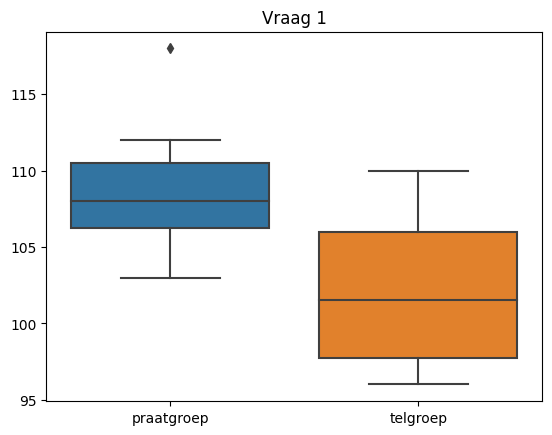

In [213]:
### Vraag 1 ###
sns.boxplot(data=df)
plt.title('Vraag 1');

In [214]:
### Vraag 4 ###
pvalue = stats.ttest_ind(praatgroep, telgroep, equal_var=False, alternative='greater')[1]
print('p-waarde: ', pvalue)

if(pvalue < a):
    print("p < a, dus H0 verwerpen")
else:
    print("p > a, dus H0 niet verwerpen")

p-waarde:  0.011446662549201621
p < a, dus H0 verwerpen


### Antwoord vraag 6

1. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)
2. De t-toets voor twee onafhankelijke steekproeven: het gaat om verschillende patiënten in de twee groepen. De zelfde patient gaat **niet** eerst tellen en dan praten.
3.  - $H_0$: $\mu_1 - \mu_2 = 0$ (De bloeddruk is hetzelfde in beide groepen)
    - $H_1$: $\mu_1 - \mu_2 > 0$ (De bloeddruk is significant lager in de telgroep)
4. p-waarde:  0.011446662549201621
5. We verwerpen de nulhypothese omdat de p-waarde kleiner is dan 0.05. Er is dus een significant verschil in bloeddruk tussen de twee groepen. De bloeddruk is significant lager in de telgroep.


## Vraag 7 

Stel dat de verdeling van de netto-typsnelheid in
woorden per minuut (wpm) voor ervaren typisten kan worden
benaderd kan worden door een normale curve met gemiddelde 60 wpm en
standaardafwijking 15 wpm
1. Wat is de kans dat de netto-snelheid van een willekeurig gekozen typist
maximaal 60 wpm is?
2. Wat is de kans dat de netto-snelheid van een willekeurig gekozen typist
nettosnelheid tussen 45 en 90 wpm ligt?
3. Zou je verbaasd zijn om een typist te vinden
wiens netto-snelheid hoger is dan 105 wpm?
4. Stel dat een speciale training zal worden gegeven aan de langzaamste 20% van de typisten. Welke typesnelheden zouden in aanmerking komen voor deze opleiding?

In [91]:
m = 60 # mean
s = 15 # standard deviation

### Vraag 1 ###
print('1. P(x = 60) = ', stats.norm.pdf(60, loc=m, scale=s))


### Vraag 2 ###
print('2. P(45 < x < 90) = ', stats.norm.cdf(90, loc=m, scale=s) - stats.norm.cdf(45, loc=m, scale=s))

### Vraag 3 ###
print('3. P(x > 105) = ', 1 - stats.norm.cdf(105, loc=m, scale=s))

### Vraag 4 ###
print('4. de langzaamste 20% van de typisten zijn de typisten met een snelheid van ', stats.norm.ppf(0.2, loc=m, scale=s))


1. P(x = 60) =  0.02659615202676218
2. P(45 < x < 90) =  0.8185946141203637
3. P(x > 105) =  0.0013498980316301035
4. de langzaamste 20% van de typisten zijn de typisten met een snelheid van  47.37568149640629


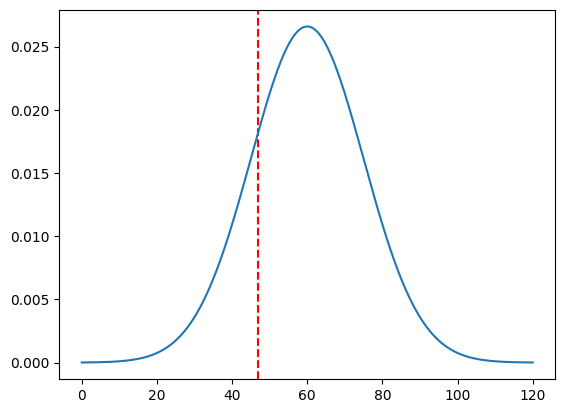

In [216]:
x = np.linspace(0, 120, 1000)
y = stats.norm.pdf(x, loc=m, scale=s)
plt.axvline(x=47, color='r', linestyle='--')
plt.plot(x, y);

### Antwoord vraag 7

1. De kans dat de netto-snelheid van een willekeurig gekozen typist 60 wpm is, is 2.66%
2. De kans dat de netto-snelheid van een willekeurig gekozen typist tussen 45 en 90 wpm ligt, is 81.85%
3. Ik zou verbaasd zijn om een typist te vinden wiens netto-snelheid hoger is dan 105 wpm, omdat de 0.135% is.
4. Als er een speciale training zou gegeven worden aan de traagste 20% van de typisten, dan zouden de typisten met een typesnelheid lager dan 48 (47.37568149640629) wpm in aanmerking komen voor deze opleiding.

## Vraag 8

Een maatstaf voor het succes van een knieoperatie is het bewegingsbereik van het kniegewricht na de operatie. Het postoperatieve bewegingsbereik werd geregistreerd voor 12 patiënten na een knieoperatie. De leeftijd van elke patiënt werd ook geregistreerd. De gegevens zijn hieronder gegeven.

1. Visualiseer de data met een geschikte plot
2. Geef de vergelijking van de regressierechte 
3. Geef het geschatte bewegingsbereik van iemand van 38 jaar oud.
4. Bereken de correlatiecoëfficient (symbool + waarde)
5. Geef de interpretatie voor de waarde van de correlatiecoëfficient
6. Stel dat we het bewegingsbereik uitdrukken als een hoek in radialen in plaats van een hoek in graden, zal de waarde van de correlatiecoëfficient dan veranderen? Illustreer je antwoord met de opgegeven data.  
hoek in radialen = hoek in graden / 180 * $π$


In [217]:
dfknie = pd.DataFrame(data={'leeftijd': [35, 24, 40, 31, 28, 25, 26, 16, 14, 20, 21, 30], 
                            'bewegingsbereik': [154, 142, 137, 133, 122, 126, 135, 135, 108, 120, 127, 122]})
dfknie.head()

,leeftijd,bewegingsbereik
0,35,154
1,24,142
2,40,137
3,31,133
4,28,122


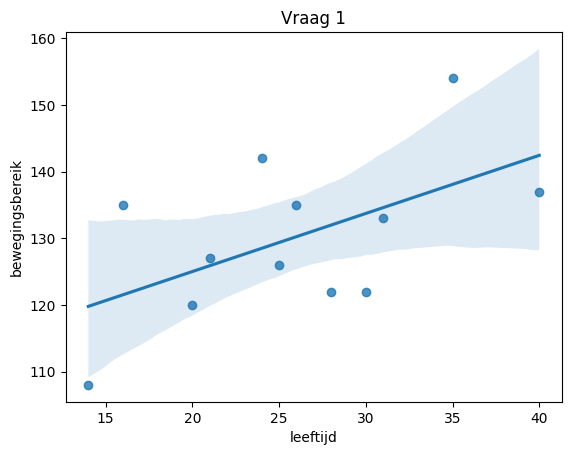

In [218]:
### Vraag 1 ###
sns.regplot(data=dfknie, x='leeftijd', y='bewegingsbereik')
plt.title('Vraag 1');

In [219]:
### Vraag 2 ###
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(
    X=dfknie[['leeftijd']].values.reshape(-1, 1),
    y=dfknie['bewegingsbereik'].values
)

print(f"y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}")

y = 0.87 * x + 107.58


In [220]:
### Vraag 3 ###
print(f"Voorspelling voor 38 jaar: {model.predict([[38]])[0]:.2f}")

Voorspelling voor 38 jaar: 140.68


In [221]:
### Vraag 4 ###
print('Correlatiecoëfficient (R): ', dfknie.corr().iloc[0, 1])

Correlatiecoëfficient (R):  0.5533560801115996


In [222]:
### Vraag 6 ###
def graden2radialen(gr):
    return gr * np.pi / 180

dfknie['bewegingsbereik'] = dfknie['bewegingsbereik'].apply(graden2radialen)
dfknie.head()

,leeftijd,bewegingsbereik
0,35,2.687807
1,24,2.478368
2,40,2.391101
3,31,2.321288
4,28,2.129302


In [223]:
### Vraag 6 ###
print('Correlatiecoëfficient (R): ', dfknie.corr().iloc[0, 1])

Correlatiecoëfficient (R):  0.5533560801115996


### Antwoord vraag 8

1. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)
2. y = 0.87 * x + 107.58
3. Het verwachte bewegingsbereik van iemand van 38 jaar oud is 140.68.
4. $R$ = 0.5533560801115996
5. Er is een gematigd verband tussen de leeftijd en het bewegingsbereik na de operatie van de knie.
6. Neen de correlatiecoëfficient zal niet veranderen. De correlatie hangt dus niet af van het gebruik van een heden.

## Vraag 9

We weten op basis van historische data dat de vluchttijden (in minuten) voor een specifieke vlucht normaal verdeeld zijn.  
De gemeten vluchttijden tussen 1 januari en 31 maart zijn hieronder gegeven. 


1. Bereken en geef een 90% betrouwbaarheidsinterval voor
de gemiddelde vluchttijd voor deze vlucht.


In [224]:
vluchttijden = np.array([57, 54, 55, 51, 56, 48, 52, 51, 59, 59, 57, 54, 55, 51, 56, 48, 52, 51, 59, 59, 57, 54, 55, 51, 56, 48, 52, 51, 59, 59, 57, 54, 55, 51, 56, 48, 52, 51, 59, 59])
len(vluchttijden)

40

In [225]:
m = np.mean(vluchttijden)
s = np.std(vluchttijden, ddof=1)
n = len(vluchttijden)
alpha = 1 - 0.9

z = stats.norm.isf(alpha/2)
print("z-score: %.5f" % z)

lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

z-score: 1.64485
Confidence interval: [53.2815, 55.1185]


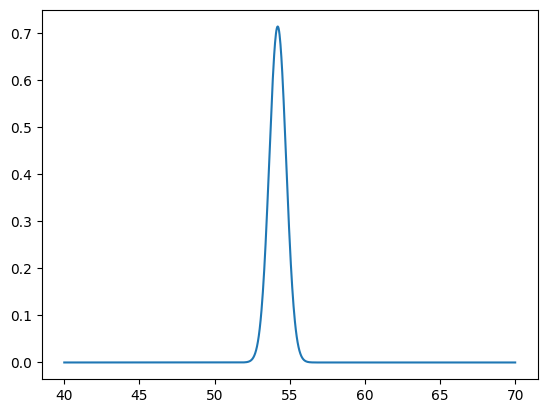

In [226]:
x = np.linspace(40, 70, 1000)
y = stats.norm.pdf(x, loc=m, scale=s/np.sqrt(n))
plt.plot(x, y);

### Antwoord vraag 9

Het betrouwbaarheidsinterval voor de gemiddelde vluchttijd is [53.2815, 55.1185]

## Vraag 10
Een volkswijsheid luidt dat er meer kinderen geboren worden gedurende bepaalde fasen van de maancyclus, in het bijzonder bij volle maan. In 2005 werd een classificatie gedaan van het aantal geboortes alnaargelang de maancyclus. 
Een steekproef van het aantal geboortes gedurende verschillende maancycli wordt hieronder gegeven.  
Is er een verband tussen de maancyclus en het aantal geboortes?

1. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
2. Formuleer de nulhypothese en de alternatieve hypothese
3. Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.


In [227]:
dfmaan = pd.DataFrame(data={'maanfase': ['nieuwe maan', 'jonge maansikkel', 'eerste kwartier', 'wassende maan', 'volle maan', 'afnemende maan', 'laatste kwartier', 'asgrauwe maan'], 
                            'aantal_dagen': [24, 152, 24, 149, 24, 150, 24, 152],
                            'aantal_geboorten': [7680, 48442, 7579, 47814, 7711, 47595, 7733, 48230]})

### Vraag 4 ###
dfmaan['verwacht'] = dfmaan['aantal_geboorten'].sum() / dfmaan['aantal_dagen'].sum() * dfmaan['aantal_dagen']
#####################

dfmaan.head(10)

,maanfase,aantal_dagen,aantal_geboorten,verwacht
0,nieuwe maan,24,7680,7649.236052
1,jonge maansikkel,152,48442,48445.161660
2,eerste kwartier,24,7579,7649.236052
3,wassende maan,149,47814,47489.007153
4,volle maan,24,7711,7649.236052
5,afnemende maan,150,47595,47807.725322
6,laatste kwartier,24,7733,7649.236052
7,asgrauwe maan,152,48230,48445.161660


In [228]:
### Vraag 4 ###
alpha = 0.05               # Significance level
n = dfmaan['aantal_geboorten'].sum()  # Sample size
k = len(dfmaan)            # Number of categories
dof = k - 1                # Degrees of freedom
observed = dfmaan['aantal_geboorten'].values
expected = dfmaan['verwacht'].values
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("p-value = %.4f" % p)

if(p < alpha):
    print("p < alpha, dus H0 verwerpen")
else:
    print("p > alpha, dus H0 niet verwerpen")

p-value = 0.5039
p > alpha, dus H0 niet verwerpen


### Antwoord vraag 10

1. Goodness-of-fit test want we willen zien of de verdeling van de geboortes over de maancyclus overeenkomt met de verwachte verdeling.
2. - $H_0$: De verdeling van de geboortes over de maancyclus komt overeen met de verwachte verdeling.
   - $H_1$: De verdeling van de geboortes over de maancyclus komt niet overeen met de verwachte verdeling.
3. $\alpha$ = 0.05
4. p-value = 0.5039
5. H0 wordt niet verworpen

## Vraag 11

Een doos bevat vijf stukjes papier, gemarkeerd met €1, €1, €1, €10 en €25.  
Een speler kiest twee stukjes papier en wint dan het grootste van de bedragen op de twee stukjes papier.  
Definieer een discrete random variabele _X_ met _X_ = gewonnen bedrag.  
1. Bepaal de discrete probabiliteitsdistributie van dit spel
- $P(X = 1) = ?$
- $P(X = 10) = ?$
- $P(X = 25) = ?$
2. Vervang in *Prob_X* hieronder [0.1, 0.3, 0.5] door de gevonden waarden voor een grafische weergave van de discrete probabiliteitsdistributie.  
3. Bereken de verwachtingswaarde (expectation) van de random variabele _X_.  


(Hint: beschouw de stukjes papier als genummerd 1, 2, 3, 4 en 5.)


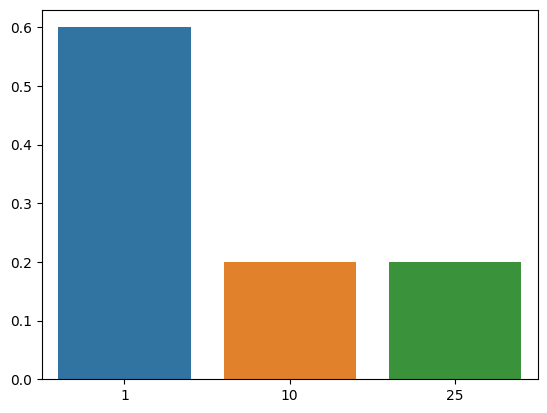

In [229]:
X = [1, 10, 25]             # Mogelijke uitkomsten. Ongewijzigd laten!!
Prob_X = [0.6, 0.2, 0.2]    # Vervang door de zelf gevonden waarden!!
sns.barplot(x = X, y = Prob_X);  # Visuele voorstelling. Ongewijzigd laten!!

### Antwoord vraag 11

1.  - $P(X = 1) = 3/5$
    - $P(X = 10) = 1/5$
    - $P(X = 25) = 1/5$
2. [0.6, 0.2, 0.2]
3. /